# Análisis predictorio de pacientes con insufiencia cardíaca
#### Delgado Agustina

El dataset contiene las siguientes variables:
1. age (in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

## Importamos las librerías y los datos

In [21]:
#Importamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
#Importamos el dataset
#Fuente https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df = pd.read_csv('heart.csv', engine = 'python')
df.columns = df.columns.str.strip().str.lower()

## Análisis exploratorio de datos EDA

In [9]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
#chequeamos que no haya datos nulos
df.isna().sum() 

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
print(df['heartdisease'].value_counts())

1    508
0    410
Name: heartdisease, dtype: int64


In [11]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

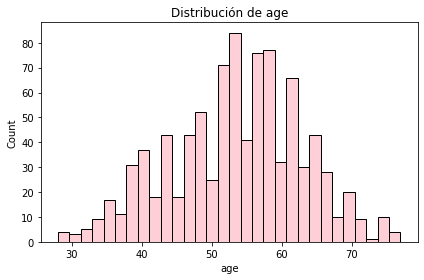

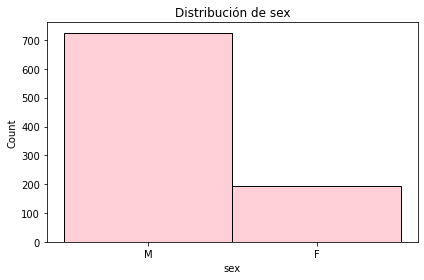

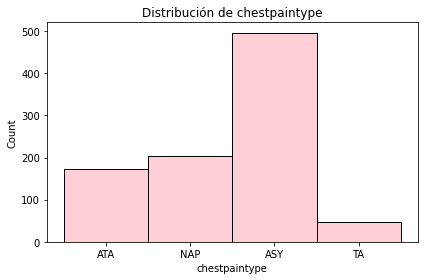

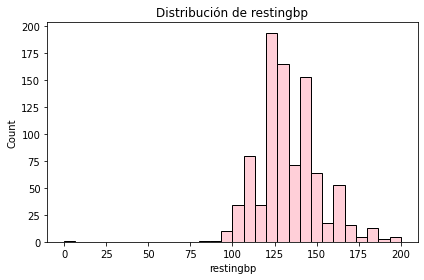

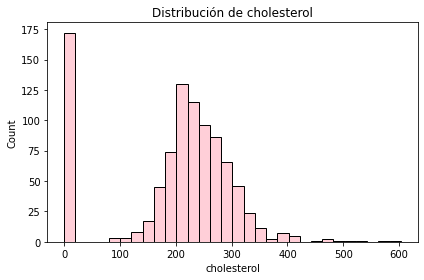

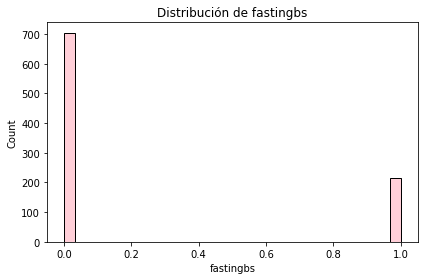

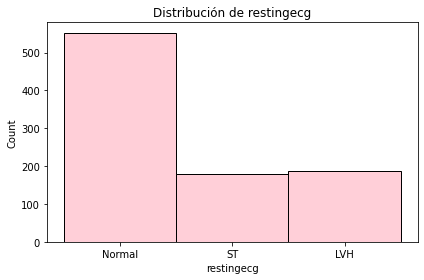

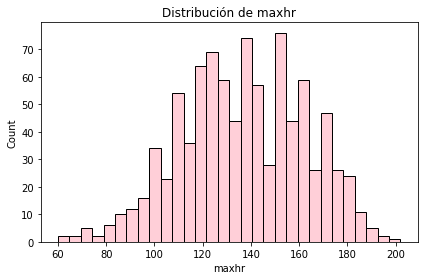

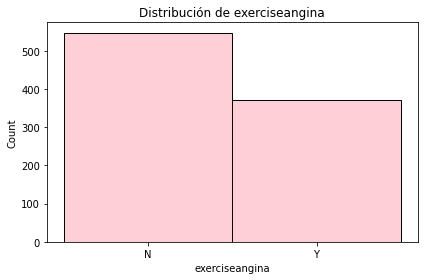

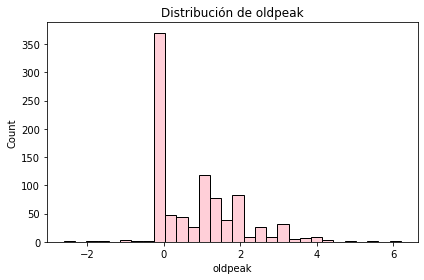

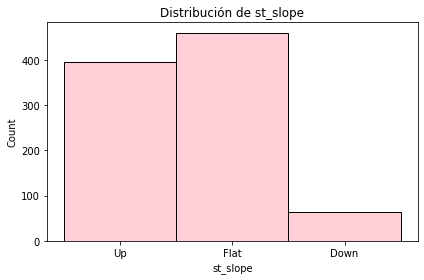

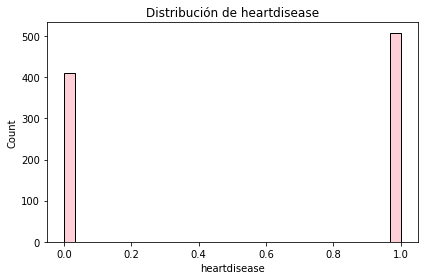

In [28]:
for feature in df.columns:
    sns.histplot(df[feature],bins=30, color = 'pink')
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()
    plt.show()

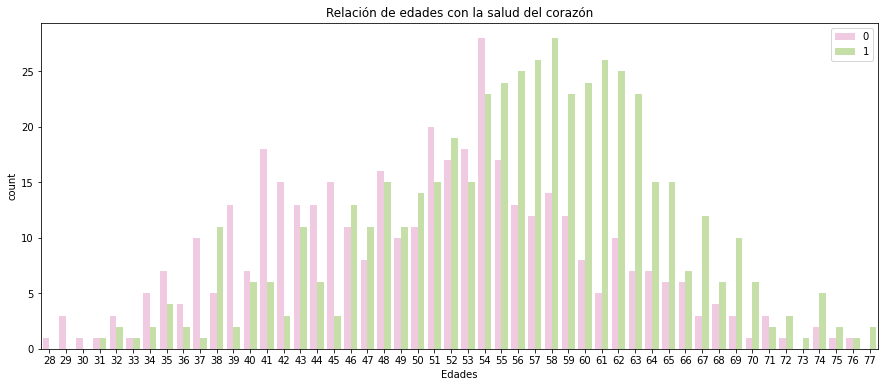

In [33]:

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'heartdisease', palette='PiYG')
plt.xlabel("Edades")
plt.title('Relación de edades con la salud del corazón')
plt.legend()
plt.show()

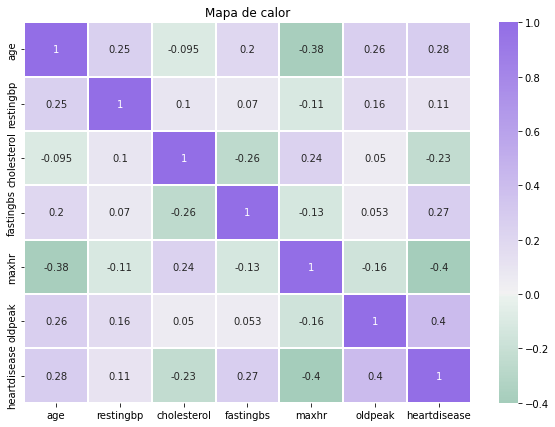

In [54]:
# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Creamos un heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), center=0, annot = True, cmap=colors, robust=True, linewidths=.1)
plt.title('Mapa de calor')
plt.show()

## Arbol de decision

In [64]:
#Convertimos las variables str a numeros
df_dummies=pd.get_dummies(data=df, drop_first=True)

In [72]:
#Seleccionamos variables
# Variables predictoras
X = df_dummies.drop(columns='heartdisease')
# Variable objetivo a predecir
Y = df_dummies.heartdisease

In [74]:
#Entrenamos el modelo
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size=0.2)
dt = tree.DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

#Calculamos la precision
print(dt.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))

0.8043478260869565
0.8043478260869565


|--- st_slope_Up <= 0.50
|   |--- maxhr <= 151.00
|   |   |--- class: 1
|   |--- maxhr >  151.00
|   |   |--- class: 1
|--- st_slope_Up >  0.50
|   |--- cholesterol <= 42.50
|   |   |--- class: 1
|   |--- cholesterol >  42.50
|   |   |--- class: 0



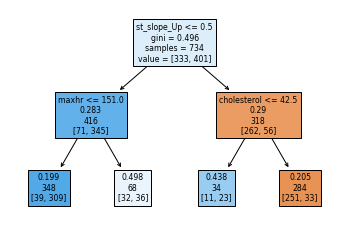

In [77]:
tree.plot_tree(dt, feature_names = x_train.columns,  
               max_depth=3,
               label='root', filled=True)
print(tree.export_text(dt, feature_names = X.columns.tolist()))